# Data Exploration

This notebook describes the data exploration steps.

## Install dependencies

In [54]:
%pip install -r data/requirements.txt
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 4.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 4.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 4.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.3/300.3 KB 5.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


## Load data

In [48]:
import pandas as pd

df = pd.read_sql_table('offenses', 'sqlite:///data/data.sqlite')

### Dataset
Below, you can see the dataset. The available columns are:
- `exceedance`: The exceedance of the speed limit in km/h
- `datetime`: The date and time of the offense
- `lat`: The latitude of the offense
- `lon`: The longitude of the offense
- `temperature`: The temperature at the offense location at the offense time
- `precipitation`: The precipitation at the offense location at the offense time
- `wind speed`: The wind speed at the offense location at the offense time

In [50]:
df.head(10)

,exceedance,datetime,lat,lon,temperature,precipitation,wind speed
0,6,2018-01-01 00:00:29,50.951697,6.981953,7.4,0.8,28.4
1,17,2018-01-01 00:01:11,50.947906,6.941059,7.4,0.8,28.4
2,6,2018-01-01 00:06:44,50.951697,6.981953,7.4,0.8,28.4
3,8,2018-01-01 00:08:34,50.936374,6.935985,7.4,0.8,28.4
4,21,2018-01-01 00:12:08,50.947906,6.941059,7.4,0.8,28.4
5,9,2018-01-01 00:14:17,50.947906,6.941059,7.4,0.8,28.4
6,16,2018-01-01 00:19:01,50.947906,6.941059,7.4,0.8,28.4
7,12,2018-01-01 00:20:21,50.936374,6.935985,7.4,0.8,28.4
8,52,2018-01-01 00:20:45,50.947906,6.941059,7.4,0.8,28.4
9,6,2018-01-01 00:21:11,50.947906,6.941059,7.4,0.8,28.4


### Data exploration
To get a first impression of the data, I executed Pandas [`describe`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) function on the dataset. The output can be seen below.

In [52]:
df.describe()

,exceedance,datetime,lat,lon,temperature,precipitation,wind speed
count,665634.000000,665634,665634.000000,665634.000000,665634.000000,665634.000000,662922.000000
mean,10.613538,2019-08-11 14:12:28.312513280,50.952222,6.950637,13.105685,0.086298,12.980096
min,6.000000,2018-01-01 00:00:29,50.849154,6.846078,-11.900000,0.000000,0.000000
25%,7.000000,2018-10-02 20:00:29,50.947906,6.941059,6.900000,0.000000,7.900000
50%,9.000000,2019-05-12 07:38:51.500000,50.947906,6.941059,12.300000,0.000000,11.900000
75%,12.000000,2020-05-25 12:51:47.500000,50.951697,6.976871,18.900000,0.000000,16.900000
max,171.000000,2021-12-31 23:57:25,51.046593,7.085497,40.800000,32.700000,72.000000
std,6.268805,NaN,0.024807,0.034965,7.827022,0.522429,6.646248


The `count` row shows that there are 665635 rows in our dataset for the `exceedance`, `datetime`, `lat`, `lon`, `temperature` and `precipitation` columns. The `wind speed` column only has 662922 rows, which means that there are 2713 rows with missing values. This is not a lot, so we can ignore these rows in our analysis.

#### Plotting the data
To get a better understanding of the data, I plotted the data.

The plot below shows the number of offenses over each of the years. One thing that sticks out is that the number of offenses appears to be very high from end of 2018 to beginning of 2019. I will investigate whether this rise goes along with changes in weather conditions later on or if there is another reason for this rise, like more speed cameras being installed.

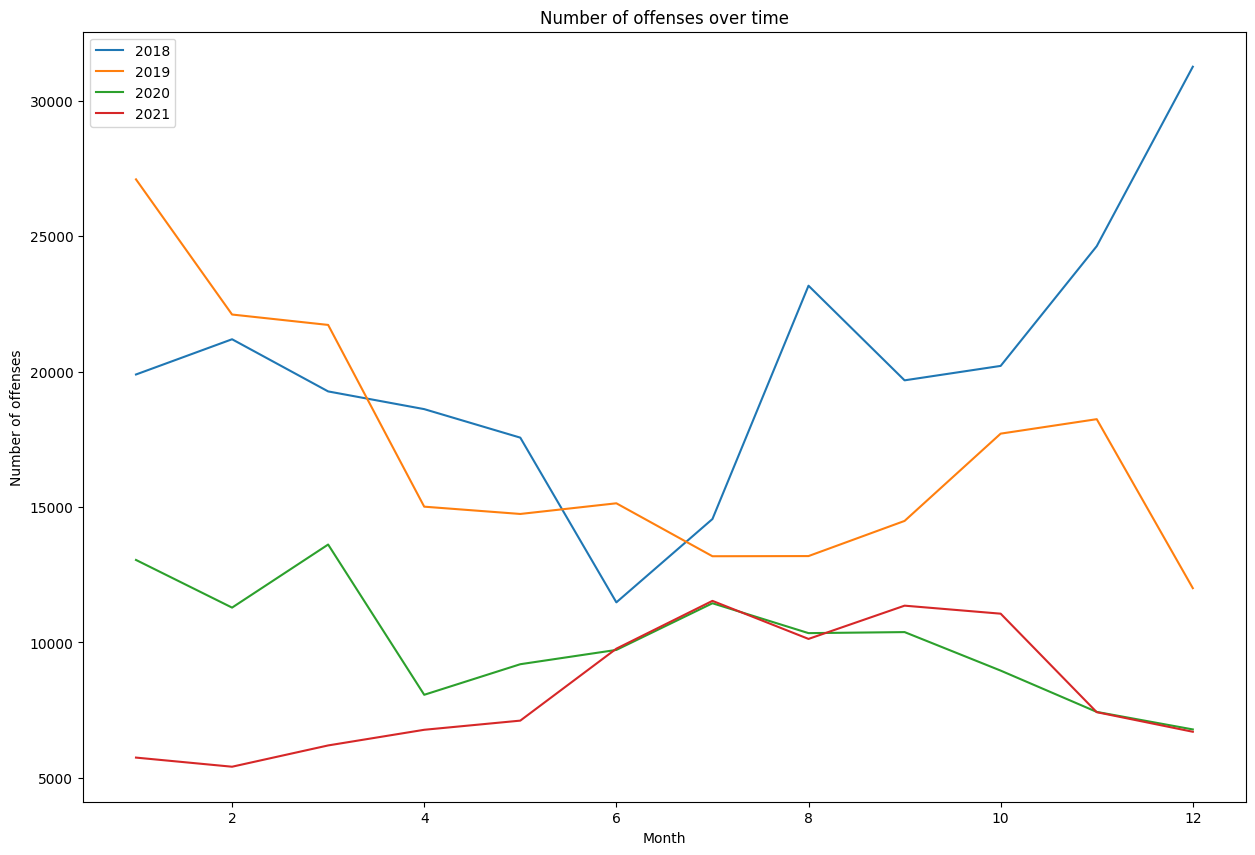

In [59]:
import matplotlib.pyplot as plt

df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month

fig, ax = plt.subplots(figsize=(15, 10))
for year in df['year'].unique():
    df[df['year'] == year].groupby('month').size().plot(ax=ax, label=year)
ax.legend()
ax.set_xlabel('Month')
ax.set_ylabel('Number of offenses')
ax.set_title('Number of offenses over time')
plt.show()

Below I plotted different weather conditions of cologne during the time of the offenses. These plots show some outliers that could be further compared to the speeding offenses in my report, like the extremely high precipitation in July 2021, the spike in wind speed in February 2020 or the exceptionally low temperature in February 2018.

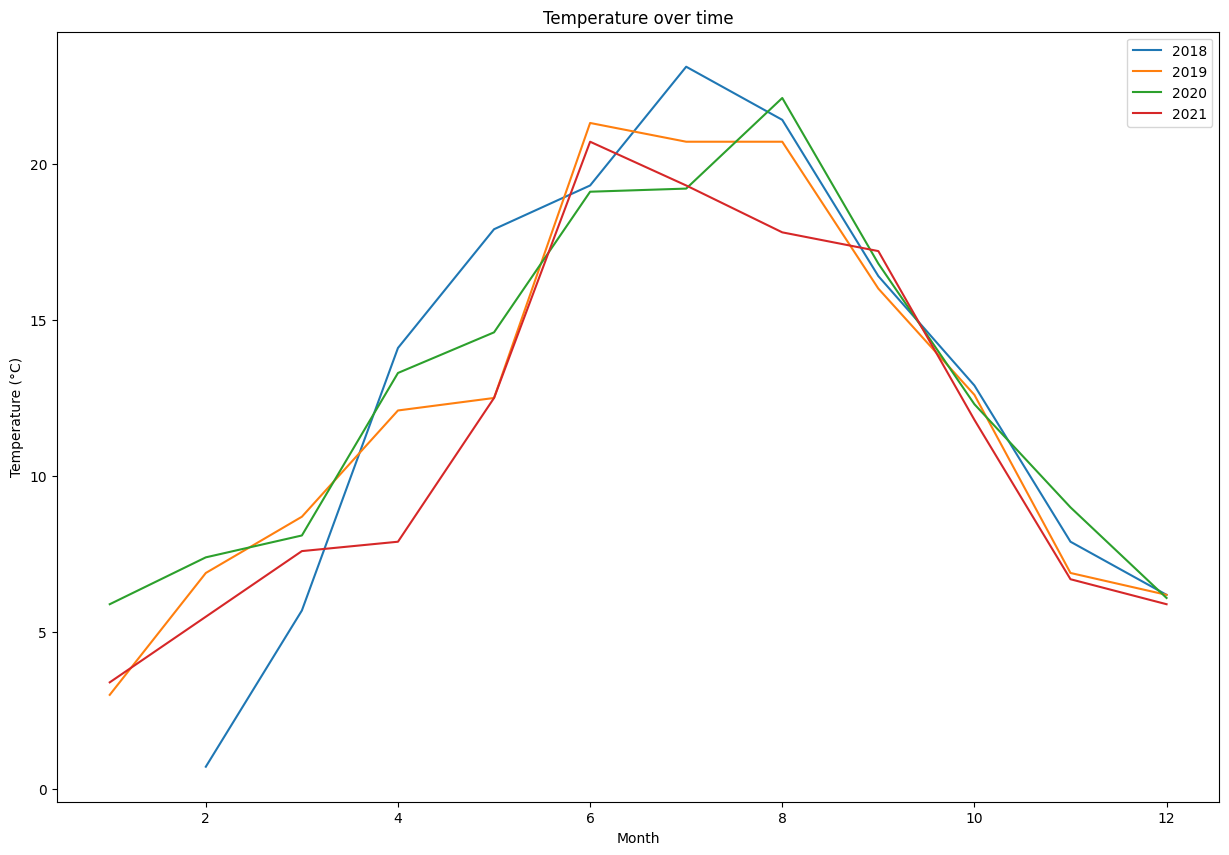

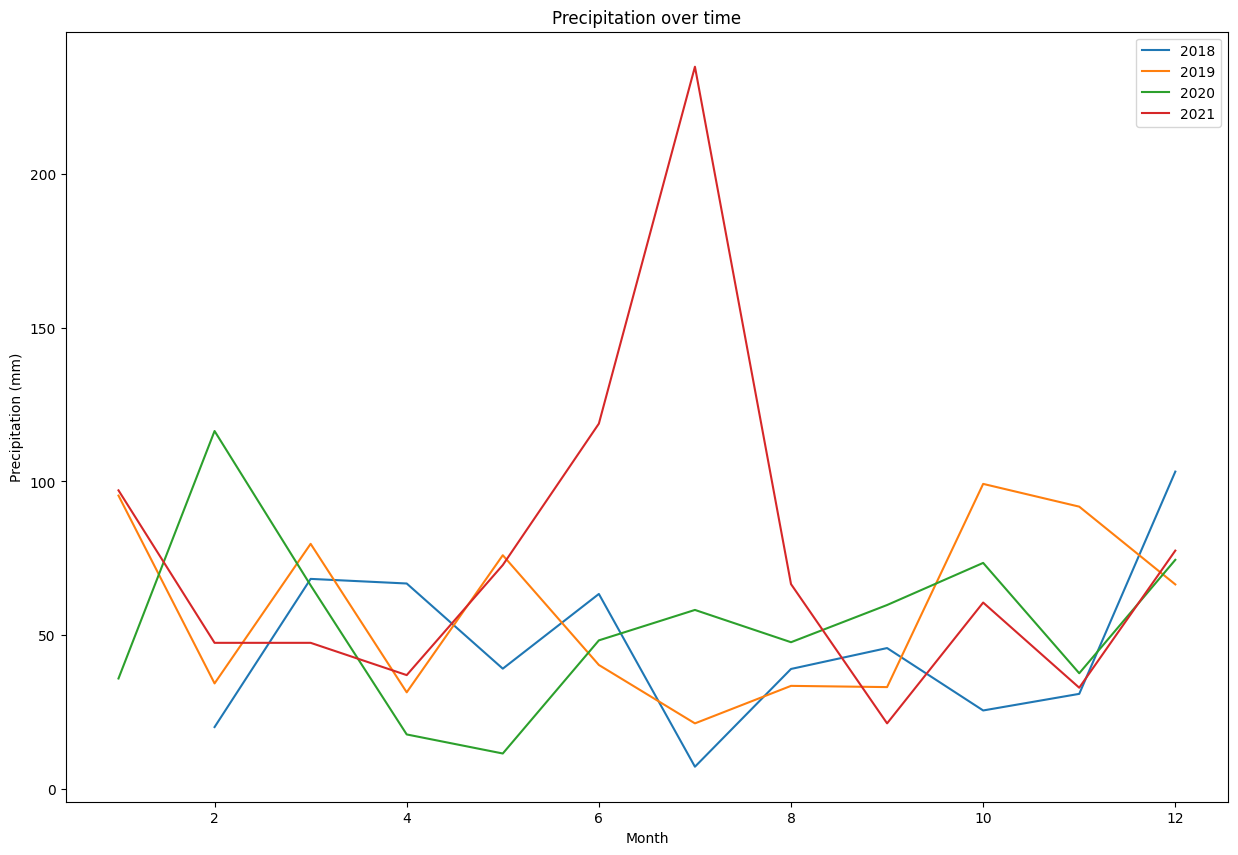

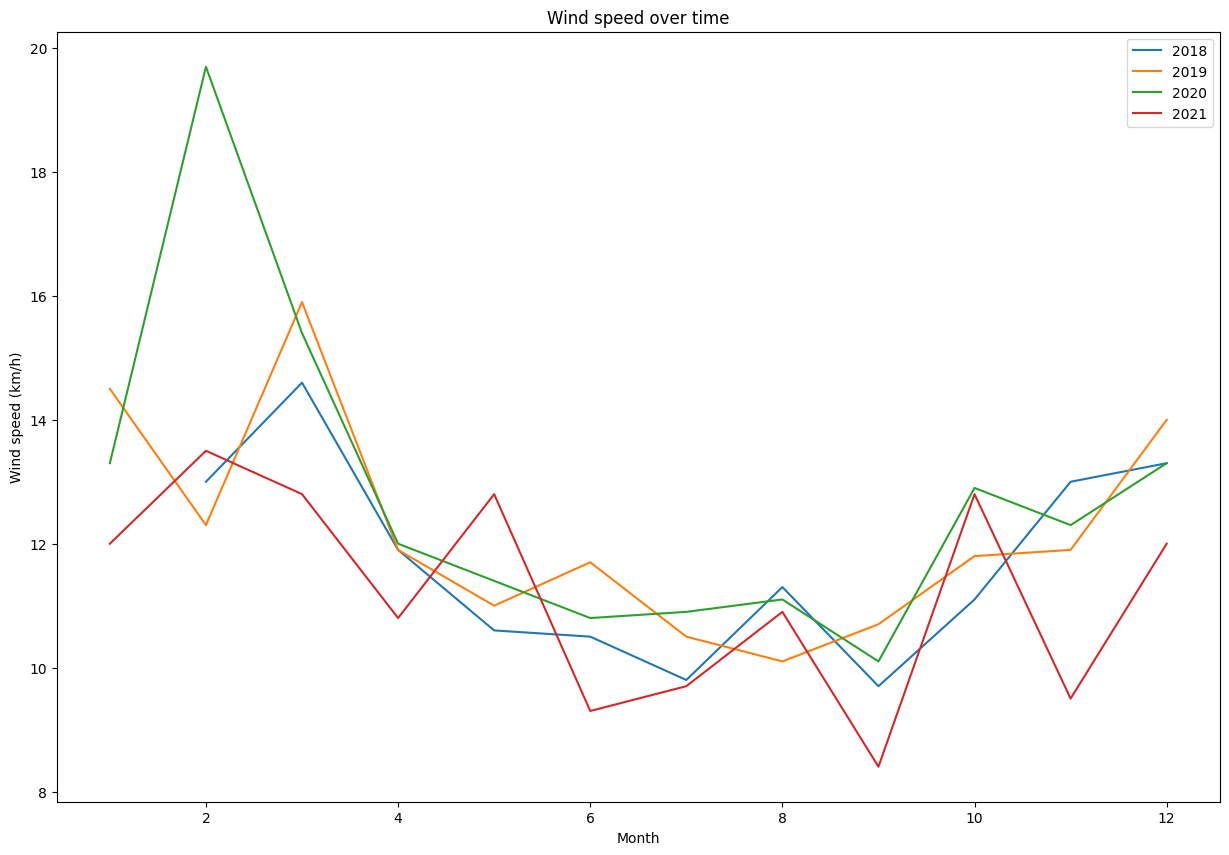

In [70]:
# Temperature over time for each year as lint plot
from meteostat import Point, Monthly

# Set time period
start = df['datetime'].min().to_pydatetime()
end = df['datetime'].max().to_pydatetime()

# Set location using mean lat and lon values
lat = 50.952222
lon = 6.950637
location = Point(lat, lon)

# Get monthly data
monthly_data = Monthly(location, start=start, end=end)
monthly_data = monthly_data.fetch()

monthly_data['year'] = monthly_data.index.year
monthly_data['month'] = monthly_data.index.month

# Plot temperature over time for each year
fig, ax = plt.subplots(figsize=(15, 10))
for year in monthly_data['tavg'].index.year.unique():
    monthly_data[monthly_data['year'] == year].groupby('month')['tavg'].mean().plot(ax=ax, label=year)
ax.legend()
ax.set_xlabel('Month')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Temperature over time')
plt.show()

# plot precipitation over time for each year
fig, ax = plt.subplots(figsize=(15, 10))
for year in monthly_data['prcp'].index.year.unique():
    monthly_data[monthly_data['year'] == year].groupby('month')['prcp'].mean().plot(ax=ax, label=year)
ax.legend()
ax.set_xlabel('Month')
ax.set_ylabel('Precipitation (mm)')
ax.set_title('Precipitation over time')
plt.show()

# plot wind speed over time for each year
fig, ax = plt.subplots(figsize=(15, 10))
for year in monthly_data['wspd'].index.year.unique():
    monthly_data[monthly_data['year'] == year].groupby('month')['wspd'].mean().plot(ax=ax, label=year)
ax.legend()
ax.set_xlabel('Month')
ax.set_ylabel('Wind speed (km/h)')
ax.set_title('Wind speed over time')
plt.show()
